## Importing useful Libraries

In [1]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

In [2]:
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import pandas as pd
import numpy as np
from statistics import stdev
import seaborn as sn

In [3]:
import librosa
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
import statistics

# Preprocessing
import sklearn.metrics as mt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


#Keras
#import keras

import warnings
warnings.filterwarnings('ignore')

# Feature Extraction 

Here,we are extacting the following features:
* rms
* spectral_centroid
* spectral_bandwidth
* spectral rolloff
* zero_crossing_rate
* MFCCs (13)
* Chroma Features(12)


In [4]:
header = 'filename rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate '
for i in range(0, 13):
    header += f' mfcc_{i}'
    
for i in range(0,12 ):
    header += f' chroma_feature{i}'
    
header += ' label'
header = header.split()

In [5]:
file = open('MIC_11_instruments_3_balancedfinal.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [6]:
Instruments = 'pia vio voi'.split()
for i in Instruments:
    for filename in os.listdir(f'C:\\IRMAS-TrainingData\\{i}'):
        songname = f'C:\\IRMAS-TrainingData\\{i}\\{filename}'
        y, sr = librosa.load(songname)
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y,n_mfcc=13, sr=sr)
        chromagram = librosa.feature.chroma_stft(y,sr=sr,hop_length=512)
        to_append = f'{filename} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        for e in chromagram:
            to_append += f' {np.mean(e)}'
        to_append += f' {i}'
        file = open('MIC_11_instruments_3_balancedfinal.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [7]:
import pandas as pd

df1=pd.read_csv("MIC_11_instruments_3_balancedfinal.csv")

In [9]:
labels=df1["label"]
print(labels)

0       pia
1       pia
2       pia
3       pia
4       pia
       ... 
2074    voi
2075    voi
2076    voi
2077    voi
2078    voi
Name: label, Length: 2079, dtype: object


In [10]:
df2=df1.drop(['filename',"label"],axis=1)
df2.head()

,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,chroma_feature2,chroma_feature3,chroma_feature4,chroma_feature5,chroma_feature6,chroma_feature7,chroma_feature8,chroma_feature9,chroma_feature10,chroma_feature11
0,0.027708,822.680638,981.072526,1262.673903,0.053256,-368.967957,208.658691,-22.032309,19.130318,-4.204968,...,0.207048,0.070548,0.147452,0.477905,0.626459,0.151434,0.110314,0.066976,0.148548,0.484164
1,0.030345,792.697670,1011.565049,1386.903921,0.046000,-367.093872,202.384766,-19.639700,26.754717,9.071177,...,0.105177,0.087379,0.185234,0.329481,0.653725,0.147405,0.113239,0.196123,0.088872,0.145747
2,0.043772,754.131484,818.186440,1282.385066,0.050755,-335.096588,232.035736,-28.312624,5.986394,4.942239,...,0.494817,0.221615,0.193345,0.196928,0.726970,0.212705,0.283977,0.484048,0.166477,0.131439
3,0.013009,780.648826,1009.536041,1193.519193,0.050901,-460.787140,207.256363,-3.270107,5.706173,3.388237,...,0.517036,0.222859,0.502949,0.298696,0.076878,0.166129,0.111350,0.257231,0.080106,0.036364
4,0.022567,727.330357,896.024404,1209.834736,0.041331,-404.348633,210.581635,-11.188134,9.544372,7.744558,...,0.322592,0.139511,0.302399,0.312285,0.162535,0.362996,0.116259,0.172835,0.334886,0.242847


## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

df_scaled=sc.fit_transform(df2)

df=pd.DataFrame(df_scaled)

In [12]:
df.columns=['rms', 'spectral_centroid', 'spectral_bandwidth', 'rolloff',
       'zero_crossing_rate', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4',
       'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11',
       'mfcc_12', 'chroma_feature0', 'chroma_feature1', 'chroma_feature2',
       'chroma_feature3', 'chroma_feature4', 'chroma_feature5',
       'chroma_feature6', 'chroma_feature7', 'chroma_feature8',
       'chroma_feature9', 'chroma_feature10', 'chroma_feature11']

In [13]:
df.head()

,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,chroma_feature2,chroma_feature3,chroma_feature4,chroma_feature5,chroma_feature6,chroma_feature7,chroma_feature8,chroma_feature9,chroma_feature10,chroma_feature11
0,-1.024169,-1.377152,-1.589858,-1.470165,-0.824160,-1.235328,1.884314,-0.473052,-0.442357,-0.415110,...,-0.665316,-1.472728,-0.951137,1.126389,2.194052,-0.990522,-1.249992,-1.548853,-0.946224,1.096902
1,-0.987490,-1.421553,-1.538381,-1.389896,-1.013525,-1.221007,1.743881,-0.377356,0.045554,0.731895,...,-1.291578,-1.352955,-0.735045,0.210794,2.372164,-1.014537,-1.229774,-0.778793,-1.344855,-1.004212
2,-0.800753,-1.478665,-1.864840,-1.457429,-0.889438,-0.976492,2.407574,-0.724240,-1.283482,0.375171,...,1.103788,-0.397691,-0.688659,-0.606897,2.850633,-0.625339,-0.049393,0.938005,-0.826462,-1.093044
3,-1.228589,-1.439396,-1.541807,-1.514848,-0.885616,-1.936988,1.852925,0.277365,-1.301415,0.240912,...,1.240380,-0.388841,1.082082,0.020891,-1.396064,-0.902938,-1.242830,-0.414425,-1.403411,-1.683332
4,-1.095661,-1.518355,-1.733435,-1.504306,-1.135358,-1.505699,1.927356,-0.039326,-1.055795,0.617280,...,0.045011,-0.981966,-0.064938,0.104719,-0.836511,0.270407,-1.208893,-0.917653,0.298491,-0.401350


In [14]:
df.shape

(2079, 30)

## Dimensionality Reduction (PCA)

In [15]:
from sklearn.decomposition import PCA
pc = PCA(n_components=30)

In [16]:
pc.fit(df)

PCA(n_components=30)

In [17]:
pc.explained_variance_

array([7.58091173e+00, 2.87287544e+00, 2.08476655e+00, 1.75551050e+00,
       1.55938010e+00, 1.37588496e+00, 1.24886807e+00, 1.20953896e+00,
       1.03375415e+00, 9.30864111e-01, 9.00125897e-01, 8.34564052e-01,
       8.03980741e-01, 6.71119311e-01, 6.31910126e-01, 5.91185140e-01,
       5.44581431e-01, 5.34133963e-01, 4.99117414e-01, 4.49990696e-01,
       3.85016995e-01, 3.58079041e-01, 3.55160918e-01, 3.27792245e-01,
       2.03759367e-01, 1.17882710e-01, 8.50987348e-02, 4.73781152e-02,
       1.68588465e-02, 4.34664211e-03])

In [18]:
print(sum(pc.explained_variance_))
var= pc.explained_variance_ratio_
print(var)

30.01443695861408
[2.52575510e-01 9.57164527e-02 6.94587925e-02 5.84888700e-02
 5.19543347e-02 4.58407719e-02 4.16089122e-02 4.02985725e-02
 3.44418970e-02 3.10138788e-02 2.99897645e-02 2.78054209e-02
 2.67864675e-02 2.23598834e-02 2.10535392e-02 1.96966926e-02
 1.81439829e-02 1.77959015e-02 1.66292446e-02 1.49924750e-02
 1.28277267e-02 1.19302268e-02 1.18330028e-02 1.09211526e-02
 6.78871194e-03 3.92753362e-03 2.83526008e-03 1.57851088e-03
 5.61691246e-04 1.44818379e-04]


In [19]:
import numpy as np
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
var1

array([25.26, 34.83, 41.78, 47.63, 52.83, 57.41, 61.57, 65.6 , 69.04,
       72.14, 75.14, 77.92, 80.6 , 82.84, 84.95, 86.92, 88.73, 90.51,
       92.17, 93.67, 94.95, 96.14, 97.32, 98.41, 99.09, 99.48, 99.76,
       99.92, 99.98, 99.99])

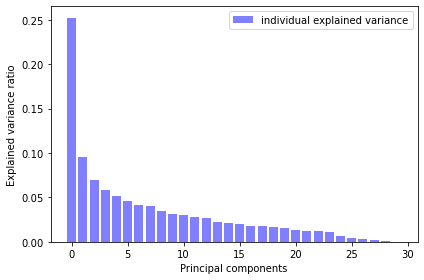

In [20]:
with plt.style.context('fast'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(30),var,alpha=0.5,align='center',
            label='individual explained variance',color="b")
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

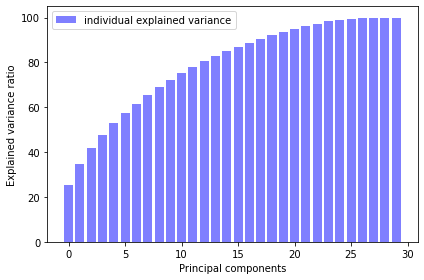

In [21]:
with plt.style.context('fast'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(30),var1,alpha=0.5,align='center',
            label='individual explained variance',color="b")
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

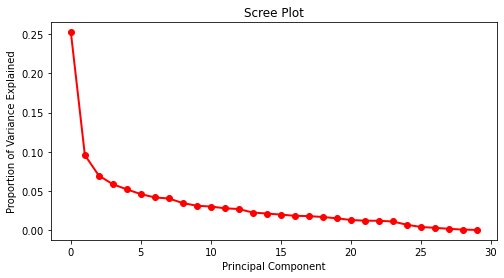

In [22]:
plt.figure(figsize=(8,4))
plt.plot(range(30),var, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [23]:
pca=PCA(n_components=20)
df_new=pca.fit_transform(df)
df_new

array([[-4.31853734, -0.42688896, -0.24620503, ..., -0.38746775,
        -0.38015569,  0.3307332 ],
       [-4.10319064, -1.12560259, -1.35133752, ..., -0.36730416,
        -0.8073546 ,  0.84036129],
       [-3.58254852, -2.08923528, -0.95350807, ..., -0.52974424,
         0.38433606, -0.39096062],
       ...,
       [ 1.06769967,  3.14287339, -1.25347719, ...,  0.70320757,
        -0.81574583,  0.03446291],
       [ 3.19481374,  2.25615913, -0.96989968, ...,  0.63798796,
        -0.40635586,  0.35535346],
       [ 1.17667343,  2.40439629, -1.85675801, ...,  0.98535906,
        -0.47177013,  0.42752667]])

In [24]:
df_pca=pd.DataFrame(df_new)
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-4.318537,-0.426889,-0.246205,0.365292,-1.070792,-0.621945,-1.992351,1.171927,-0.212519,0.493011,-2.041041,0.941043,-0.507438,2.671248,0.251622,-1.299997,-1.006451,-0.387468,-0.380156,0.330733
1,-4.103191,-1.125603,-1.351338,-0.106120,0.015185,-0.935577,-1.251296,-0.046344,-1.600806,-0.704130,-2.505036,0.481430,-0.368715,1.852674,0.300585,-0.176975,-1.241985,-0.367304,-0.807355,0.840361
2,-3.582549,-2.089235,-0.953508,-1.220617,0.003784,0.344935,-0.211327,-2.239817,0.640268,0.249493,-2.088202,-0.429925,-0.440885,1.801582,0.913698,0.613623,-0.449032,-0.529744,0.384336,-0.390961
3,-4.173603,-1.471922,3.625212,-2.271682,-0.268680,0.571868,1.098222,-0.745604,0.608991,-0.887859,-0.158551,-0.120701,0.539814,-0.362407,-0.060020,0.497664,-0.563710,-0.982371,1.032693,0.475916
4,-4.871645,-0.801536,-1.338841,-0.043836,-0.467206,-0.629255,0.022745,0.655638,0.109582,0.352707,-0.753344,-0.489393,-0.384810,0.126807,-0.797873,0.434289,0.822976,0.005278,0.669361,0.104533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2.868983,-0.003362,-1.600115,1.776362,0.220608,1.494419,0.974584,0.655938,0.183788,-1.494837,-0.125430,-0.084308,1.135076,-0.242977,-0.053680,-0.017624,0.551877,-0.232567,0.526069,-0.751478
2075,2.308352,1.628512,-0.971081,2.016573,0.389705,0.885158,0.765008,0.998956,-0.266871,-1.003272,-0.348576,0.009232,1.264764,-0.373252,0.065468,0.233263,0.829477,-0.147784,0.137026,-0.611569
2076,1.067700,3.142873,-1.253477,0.722695,1.131175,-0.535789,0.663319,0.578441,1.688128,0.419797,-0.767820,0.380577,0.392810,-0.001156,0.500366,-0.262315,-0.195671,0.703208,-0.815746,0.034463
2077,3.194814,2.256159,-0.969900,-0.464057,0.136336,-0.472251,-1.198353,0.410297,0.796790,-1.511866,-1.324079,0.483088,-1.123171,0.275069,0.168584,0.113253,-0.228069,0.637988,-0.406356,0.355353


In [25]:
df_pca.columns=[f"PCA_{i+1}" for i in df_pca.columns]

In [26]:
df_pca.head(3)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20
0,-4.318537,-0.426889,-0.246205,0.365292,-1.070792,-0.621945,-1.992351,1.171927,-0.212519,0.493011,-2.041041,0.941043,-0.507438,2.671248,0.251622,-1.299997,-1.006451,-0.387468,-0.380156,0.330733
1,-4.103191,-1.125603,-1.351338,-0.106120,0.015185,-0.935577,-1.251296,-0.046344,-1.600806,-0.704130,-2.505036,0.481430,-0.368715,1.852674,0.300585,-0.176975,-1.241985,-0.367304,-0.807355,0.840361
2,-3.582549,-2.089235,-0.953508,-1.220617,0.003784,0.344935,-0.211327,-2.239817,0.640268,0.249493,-2.088202,-0.429925,-0.440885,1.801582,0.913698,0.613623,-0.449032,-0.529744,0.384336,-0.390961


In [27]:
dataset=pd.concat([df_pca,labels],axis=1)

In [28]:
dataset.head(2)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,label
0,-4.318537,-0.426889,-0.246205,0.365292,-1.070792,-0.621945,-1.992351,1.171927,-0.212519,0.493011,...,0.941043,-0.507438,2.671248,0.251622,-1.299997,-1.006451,-0.387468,-0.380156,0.330733,pia
1,-4.103191,-1.125603,-1.351338,-0.106120,0.015185,-0.935577,-1.251296,-0.046344,-1.600806,-0.704130,...,0.481430,-0.368715,1.852674,0.300585,-0.176975,-1.241985,-0.367304,-0.807355,0.840361,pia


In [29]:
dataset = shuffle(dataset)

In [30]:
dataset.head(2)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,label
197,-3.020311,-0.036689,-1.488483,1.894488,0.691274,2.214826,0.270115,0.678212,-0.506349,-0.305151,...,-1.691182,-1.052466,0.950867,0.999745,-0.694523,0.187978,-1.103161,-0.575431,-0.361189,pia
1372,0.641917,-0.794384,-0.595386,-1.417882,-0.454931,-2.043087,2.180325,-1.211453,-1.979621,1.349631,...,0.276060,-0.981525,-0.968471,-0.207556,0.672398,0.081023,-0.984899,-0.282806,-0.189684,voi


In [31]:
dataset.shape

(2079, 21)

# Preparing the model 

* Label encoding
* Standardizing the features
* Train and Test Split

In [32]:
# encoding labels to 0 and 1

instru_list = dataset.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(instru_list)

In [33]:
instru_list

197     pia
1372    voi
1982    voi
1183    vio
1965    voi
       ... 
317     pia
1103    vio
1873    voi
464     pia
874     vio
Name: label, Length: 2079, dtype: object

In [34]:
y

array([0, 2, 2, ..., 2, 0, 1])

In [35]:
X=dataset.iloc[:, :-1]
X.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20
197,-3.020311,-0.036689,-1.488483,1.894488,0.691274,2.214826,0.270115,0.678212,-0.506349,-0.305151,0.316316,-1.691182,-1.052466,0.950867,0.999745,-0.694523,0.187978,-1.103161,-0.575431,-0.361189
1372,0.641917,-0.794384,-0.595386,-1.417882,-0.454931,-2.043087,2.180325,-1.211453,-1.979621,1.349631,-1.477147,0.276060,-0.981525,-0.968471,-0.207556,0.672398,0.081023,-0.984899,-0.282806,-0.189684
1982,3.804247,-0.367751,-1.062446,-1.286999,0.716704,0.203316,-0.545900,0.490942,0.542878,-0.031290,0.179054,-1.427569,1.562586,1.150150,-0.181597,-0.587328,-0.150253,-0.049039,0.318662,0.026441
1183,5.262178,-1.467952,-0.785572,0.810420,-2.507668,-0.188836,-0.117860,-0.900313,1.089410,-1.056878,1.663805,-1.096733,0.328712,0.863802,-0.208283,0.297529,-0.898124,0.232634,0.197449,-0.351791
1965,0.388203,0.512928,-0.635227,1.742398,0.027405,-1.290251,-1.519243,2.425015,-1.246470,0.087499,0.000877,-0.893565,0.932801,-1.347564,0.294843,1.778354,-1.107347,0.288672,0.291101,0.234607


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1234456)

In [37]:
X_train.shape

(1663, 20)

In [38]:
X_test.shape

(416, 20)

## Confusion Matrix_plot

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# SVM

In [40]:
svclassifier = SVC(kernel='rbf',random_state=259641)
svclassifier.fit(X_train, y_train)
predicted_labels = svclassifier.predict(X_test)
print("Recall: ", recall_score(y_test, predicted_labels,average=None))
print("Precision: ", precision_score(y_test, predicted_labels,average=None))
print("F1-Score: ", f1_score(y_test, predicted_labels, average=None))
print("Accuracy: %.2f  ," % accuracy_score(y_test, predicted_labels,normalize=True), accuracy_score(y_test, predicted_labels,normalize=False) )
print("Number of samples:",y_test.shape[0])
cm=confusion_matrix(y_test, predicted_labels)

Recall:  [0.8525641  0.60833333 0.90714286]
Precision:  [0.89261745 0.79347826 0.72571429]
F1-Score:  [0.87213115 0.68867925 0.80634921]
Accuracy: 0.80  , 333
Number of samples: 416


In [41]:
print(mt.classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       156
           1       0.79      0.61      0.69       120
           2       0.73      0.91      0.81       140

    accuracy                           0.80       416
   macro avg       0.80      0.79      0.79       416
weighted avg       0.81      0.80      0.80       416



Confusion matrix, without normalization
[[133   8  15]
 [ 14  73  33]
 [  2  11 127]]


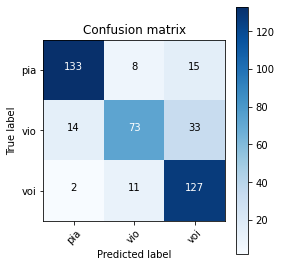

In [42]:
plt.figure(figsize=(4,4))
plot_confusion_matrix(cm, classes=['pia','vio', 'voi'],
                      title='Confusion matrix')

# RandomForest

In [43]:
RFClassifier = RandomForestClassifier(random_state=128649)
RFClassifier.fit(X_train, y_train)
predicted_labels = RFClassifier.predict(X_test)
print("Recall: ", recall_score(y_test, predicted_labels,average=None))
print("Precision: ", precision_score(y_test, predicted_labels,average=None))
print("F1-Score: ", f1_score(y_test, predicted_labels, average=None))
print("Accuracy: %.2f  ," % accuracy_score(y_test, predicted_labels,normalize=True), accuracy_score(y_test, predicted_labels,normalize=False) )
print("Number of samples:",y_test.shape[0])

Recall:  [0.80128205 0.55833333 0.91428571]
Precision:  [0.88652482 0.75280899 0.68817204]
F1-Score:  [0.84175084 0.64114833 0.78527607]
Accuracy: 0.77  , 320
Number of samples: 416


In [44]:
print(mt.classification_report(y_test,RFClassifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       156
           1       0.75      0.56      0.64       120
           2       0.69      0.91      0.79       140

    accuracy                           0.77       416
   macro avg       0.78      0.76      0.76       416
weighted avg       0.78      0.77      0.76       416



In [45]:
cm2=confusion_matrix(y_test, predicted_labels)

Confusion matrix, without normalization
[[125  11  20]
 [ 15  67  38]
 [  1  11 128]]


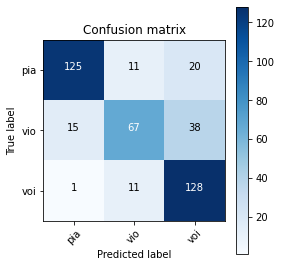

In [46]:
plt.figure(figsize=(4,4))
plot_confusion_matrix(cm2, classes=['pia','vio', 'voi'],
                      title='Confusion matrix')

# xgboost

In [47]:
XGBvlassifier = XGBClassifier(random_state=1289564)

In [48]:
XGBvlassifier.fit(X_train, y_train)

[20:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=1289564, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
predicted_labels = XGBvlassifier.predict(X_test)

In [50]:
print("Recall: ", recall_score(y_test, predicted_labels,average=None))
print("Precision: ", precision_score(y_test, predicted_labels,average=None))
print("F1-Score: ", f1_score(y_test, predicted_labels, average=None))
print("Accuracy: %.2f  ," % accuracy_score(y_test, predicted_labels,normalize=True), accuracy_score(y_test, predicted_labels,normalize=False) )

print("Number of samples:",y_test.shape[0])

Recall:  [0.81410256 0.6        0.87142857]
Precision:  [0.86986301 0.73469388 0.70930233]
F1-Score:  [0.8410596  0.66055046 0.78205128]
Accuracy: 0.77  , 321
Number of samples: 416


In [51]:
print(mt.classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       156
           1       0.73      0.60      0.66       120
           2       0.71      0.87      0.78       140

    accuracy                           0.77       416
   macro avg       0.77      0.76      0.76       416
weighted avg       0.78      0.77      0.77       416



In [52]:
cm3=confusion_matrix(y_test, predicted_labels)

Confusion matrix, without normalization
[[127  12  17]
 [ 15  72  33]
 [  4  14 122]]


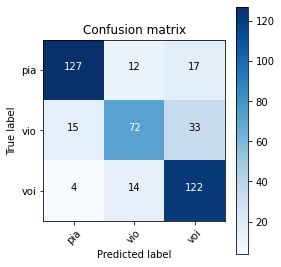

In [53]:
plt.figure(figsize=(4,4))
plot_confusion_matrix(cm3, classes=['pia','vio', 'voi'],
                      title='Confusion matrix')

## KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 66)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=66)

In [55]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm4 = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[133   8  15]
 [ 14  73  33]
 [  2  11 127]]


0.7235576923076923

In [57]:
print("Recall: ", recall_score(y_test, y_pred,average=None))
print("Precision: ", precision_score(y_test, y_pred,average=None))
print("F1-Score: ", f1_score(y_test, y_pred, average=None))

Recall:  [0.85897436 0.34166667 0.9       ]
Precision:  [0.77011494 0.82       0.65625   ]
F1-Score:  [0.81212121 0.48235294 0.75903614]


In [58]:
print(mt.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       156
           1       0.82      0.34      0.48       120
           2       0.66      0.90      0.76       140

    accuracy                           0.72       416
   macro avg       0.75      0.70      0.68       416
weighted avg       0.75      0.72      0.70       416



Confusion matrix, without normalization
[[134   2  20]
 [ 33  41  46]
 [  7   7 126]]


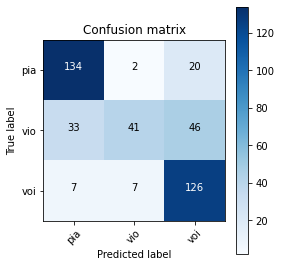

In [59]:
plt.figure(figsize=(4,4))
plot_confusion_matrix(cm4, classes=['pia','vio', 'voi'],
                      title='Confusion matrix')

### DEMO

In [60]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd

In [65]:
audio_file='C:\\IRMAS-TrainingData\\pia\\[pia][cla]1283__2.wav'

In [66]:
ipd.Audio(audio_file)

In [67]:
header = 'rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate '
for i in range(0,13):
    header += f' mfcc_{i}'
    
for i in range(0,12):
    header += f' chroma_feature{i}'
header = header.split()

In [68]:
file = open('single_audio5.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [69]:
y, sr = librosa.load(audio_file)
rms = librosa.feature.rms(y=y)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y,n_mfcc=13, sr=sr)
chromagram = librosa.feature.chroma_stft(y,sr=sr,hop_length=512)
to_append = f'{np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
for e in mfcc:
    to_append += f' {np.mean(e)}'
for e in chromagram:
    to_append += f' {np.mean(e)}'
file = open('single_audio5.csv', 'a', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(to_append.split())

In [70]:
data=pd.read_csv("single_audio5.csv",)

In [71]:
data.head()

,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,chroma_feature2,chroma_feature3,chroma_feature4,chroma_feature5,chroma_feature6,chroma_feature7,chroma_feature8,chroma_feature9,chroma_feature10,chroma_feature11
0,0.006277,723.085594,1057.118273,881.287748,0.049925,-596.941467,202.797714,36.434105,-1.789205,-4.930523,...,0.189573,0.265745,0.135171,0.408978,0.252544,0.092197,0.142801,0.042433,0.040341,0.022858


In [72]:
data_scaled=sc.transform(data)

data_1=pd.DataFrame(data_scaled)

In [73]:
data_1.shape

(1, 30)

In [74]:
data_1.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.322216,-1.524641,-1.461479,-1.71659,-0.9111,-2.977445,1.753125,1.865383,-1.78107,-0.477795,...,-0.772743,-0.083654,-1.021374,0.701193,-0.248534,-1.343581,-1.025395,-1.695197,-1.669035,-1.767186


In [75]:
pc.transform(data_1)

array([[-5.07487963, -1.40630645,  3.61777704, -1.98908442,  0.61339048,
        -1.10617216,  0.48834534,  0.02271073,  1.25143614, -1.89980993,
        -0.86616008,  1.0827912 ,  0.04837114,  0.01556415,  0.5717866 ,
         0.10356267, -1.29126154,  0.900461  , -0.53664075,  0.11989276,
        -0.67103859, -0.61051159, -0.46041427, -0.1190277 ,  1.09682565,
        -0.9670171 ,  0.3227387 , -0.27683294,  0.19894844,  0.10278592]])

In [76]:
data_new=pca.transform(data_1)
data_new

array([[-5.07487963, -1.40630645,  3.61777704, -1.98908442,  0.61339048,
        -1.10617216,  0.48834534,  0.02271073,  1.25143614, -1.89980993,
        -0.86616008,  1.0827912 ,  0.04837114,  0.01556415,  0.5717866 ,
         0.10356267, -1.29126154,  0.900461  , -0.53664075,  0.11989276]])

In [77]:
data_pca=pd.DataFrame(data_new)
data_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-5.07488,-1.406306,3.617777,-1.989084,0.61339,-1.106172,0.488345,0.022711,1.251436,-1.89981,-0.86616,1.082791,0.048371,0.015564,0.571787,0.103563,-1.291262,0.900461,-0.536641,0.119893


In [78]:
data_pca.columns=[f"PCA_{i+1}" for i in data_pca.columns]

In [79]:
data_pca

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20
0,-5.07488,-1.406306,3.617777,-1.989084,0.61339,-1.106172,0.488345,0.022711,1.251436,-1.89981,-0.86616,1.082791,0.048371,0.015564,0.571787,0.103563,-1.291262,0.900461,-0.536641,0.119893


In [82]:
a=svclassifier.predict(data_pca)

In [83]:
def check(a):
    if (a[0])==0:
        print("The instrument is Piano")
    elif a[0]==1:
        print("The instrument is Violin") 
    elif a[0]==2:
        print("This is Human voice")

In [84]:
check(a)

The instrument is Piano


In [85]:
b=RFClassifier.predict(data_pca)

In [86]:
check(b)

The instrument is Piano


In [87]:
c=XGBvlassifier.predict(data_pca)

In [88]:
check(c)

The instrument is Piano


In [89]:
d=classifier.predict(data_pca)

In [90]:
check(d)

The instrument is Piano
